# Auxiliary Telescope Optical Geometry for CTIO

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : January 13th 2017
- update :


Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating

## Constants for conversions

In [136]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.

In [41]:
arcdeg_to_arcmin=60.
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [42]:
deg_to_rad=N(pi)/180.

/Users/dagoret-campagnesylvie/MacOsX/External/SageMath/sage-7.4/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2869: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
rad_to_deg=1/deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec

## Configuration parameters
----------------------------------

#### Telescope

In [44]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [45]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Grating

In [46]:
Ronchi_r=200 # number of lines per mm
Ronchi_a=mm_to_m/Ronchi_r  # line spacing in meter unit
Ronchi_size=2*inch_to_mm*mm_to_m # size of Ronchi Grating in meter
Ronchi_N=Ronchi_size/Ronchi_a   # total number of lines

#### Filter

In [47]:
Filt_D=0.15 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD Detector

In [48]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [49]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [50]:
print "pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec

pixel viewing angle in arcsec =  1.23428571428571/pi


### Beam size at filter position


In [51]:
def Y(x):
    y=Tel_Diameter/2.*(1-x/Tel_Focal_Length)
    return y

In [52]:
def y(x,z):
    y=Tel_Diameter/2.*(1-x/Tel_Focal_Length)
    return y

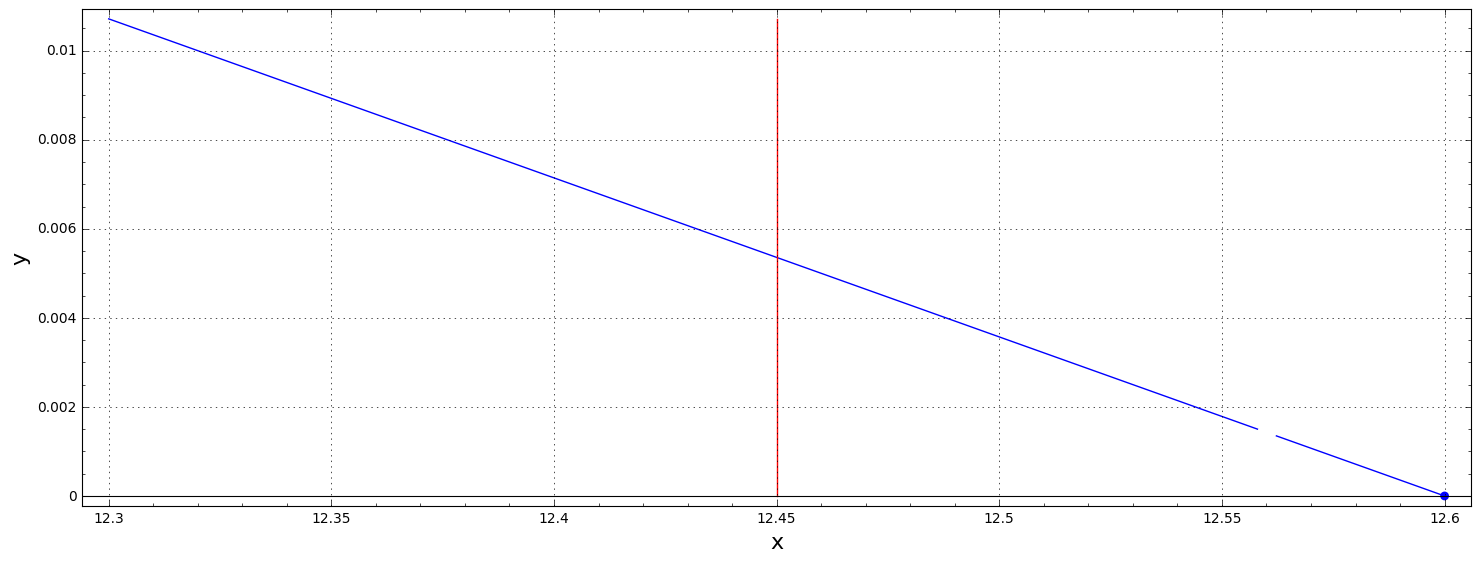

In [53]:
Ymax=Y(Tel_Focal_Length-2*Filt_D)
FocalP=point((Tel_Focal_Length, 0), size=40)
p1=plot(Y(x),(x,Tel_Focal_Length-2*Filt_D,Tel_Focal_Length),figsize=(15,8),frame=True,gridlines=True,axes_labels=['x','y'])
Filter=line( [(Tel_Focal_Length-Filt_D,0),(Tel_Focal_Length-Filt_D,Ymax)], color="red",thickness=1)
p=FocalP+p1+Filter
show(p, figsize=15,aspect_ratio=10)

In [54]:
YatFilter=Ymax=Y(Tel_Focal_Length-Filt_D)

In [55]:
print "Beam size at Filter = ",YatFilter*m_to_mm,' mm'

Beam size at Filter =  5.35714285714289  mm


## Incident angle of beam

In [56]:
Beam_angle=atan(Tel_Diameter/2./Tel_Focal_Length) # beam incident angle in radian

In [57]:
print 'Beam_angle = ', Beam_angle, ' rad'
print 'Beam_angle = ', Beam_angle*rad_to_arcsec, ' arcsec'

Beam_angle =  0.0356991126793240  rad
Beam_angle =  23133.0250162019/pi  arcsec


## Number of grating lines in the optical beam

In [58]:
Ronchi_NbLines_in_Beam=YatFilter*m_to_mm*Ronchi_r

In [59]:
print "Number of Ronchi grating lines in optical beam = ",Ronchi_NbLines_in_Beam

Number of Ronchi grating lines in optical beam =  1071.42857142858


## Ronchi Grating Dispersion Law
-------------------------------
We know the dispersion law of the light intensity is done according the law:

$$
I(\theta) = \frac{I_0}{N^2} \left( \frac{\sin \beta}{\beta} \right)^2 \cdot \left( \frac{\sin N \alpha}{\sin \alpha} \right)^2
$$

where
$$
\begin{array} {ccc}
\alpha & = & \frac{\pi a }{\lambda} \sin \theta \\
\beta & = & \frac{\pi b }{\lambda} \sin \theta
\end{array}
$$
- $\theta$ is the angle of dispersion
- $\lambda$ is the wavelength
- $a$ is the line groove pitch of Ronchi grating
- $b$ is the line width of Ronchi Gration

In [60]:
var("th b wl")
def diffrac_pattern(th,b,wl):
    '''
    diffrac_pattern:
    Compute the diffraction pattern
    - th : the angle of diffraction in rad
    - b : the width of the slot in m
    - wl : the wavelength in m
    '''
    beta=pi*b/wl*sin(th)
    sinus_card=sin(beta)/beta
    return sinus_card^2

In [61]:
var("th a wl N")
def interference_pattern(th,a,wl,N):
    """
    Interference_pattern:
    Compute the diffrac pattern
    - th : the angle of diffraction in rad
    - b : the width of the slot in m
    - wl : the wavelength in m
    
    """
    
    alpha=pi*(a/wl)*sin(th)
    numer=sin(N*alpha)
    denom=sin(alpha)
    ratio=numer/denom
    return ratio^2/NN^2

In [62]:
var("th a b wl N")
def ronchi_pattern(th,a,b,wl,N):
    prod=diffrac_pattern(th,b,wl)*interference_pattern(th,a,wl,N)
    return prod

## End of Beam on Focal Surface


In [63]:
def PlotEndBeam():
    '''
    X where is taken  the Bean end at X = Tel_Focal_Length-Filt_D
    Npoints : number of incoming points

    '''
    Npoints=4
    Ymax=Y(Tel_Focal_Length-2*Filt_D)
    Ymax2=Y(Tel_Focal_Length-Filt_D)
    FocalP=point((Tel_Focal_Length, 0), size=40)
    p1=plot(Y(x),(x,Tel_Focal_Length-2*Filt_D,Tel_Focal_Length),figsize=(15,8),frame=True,gridlines=True,axes_labels=['x','y'])
    p2=plot(- Y(x),(x,Tel_Focal_Length-2*Filt_D,Tel_Focal_Length),figsize=(15,8),frame=True,gridlines=True,axes_labels=['x','y'])


    Filter=line( [(Tel_Focal_Length-Filt_D,-Ymax2),(Tel_Focal_Length-Filt_D,Ymax2)], color="red",thickness=1)
    p=FocalP+p1+p2+Filter
    show(p, figsize=15,aspect_ratio=10)
        
    

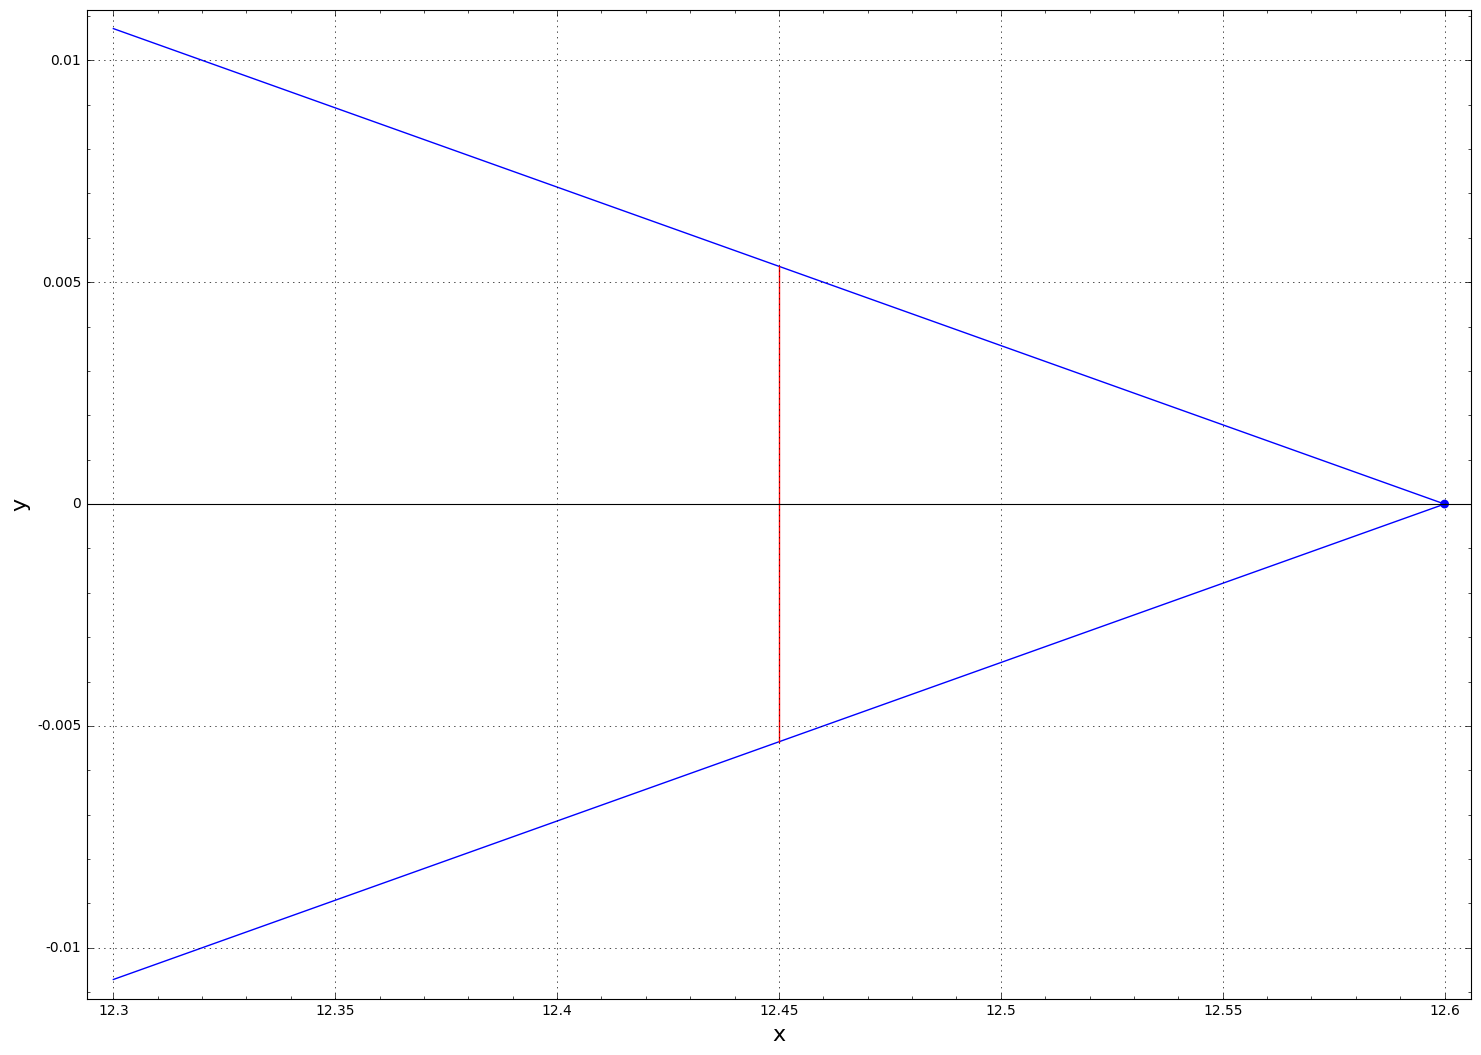

In [64]:
PlotEndBeam()

In [71]:
import numpy as np

In [144]:
def PlotEndBeam2(df,k,N,ratio=1):
    
    df=df*m_to_cm # convert into cm
    y2max=1/Tel_Fnum/2.*df
    y2=np.linspace(-y2max,y2max,N)
    
    optical_obj= []
    
    FocalP=point((df, 0), size=40) # Focal Point
    optical_obj.append(FocalP)
    

    
    for i in range(N):
        optical_obj.append(line( [(-k*df+df,k*y2[i]),(0,y2[i])], color="red",thickness=1))
        optical_obj.append(line( [(0,y2[i]),(df,0)], color="red",thickness=1))
      
    NbObj=len(optical_obj)
    
    for i in range(NbObj):
        if(i==0):
            p=optical_obj[i]
        else:
            p=p+optical_obj[i]
            
    show(p, figsize=15,aspect_ratio=ratio,frame=True,gridlines=True,axes_labels=['x (cm)','y (cm)'])
        
    

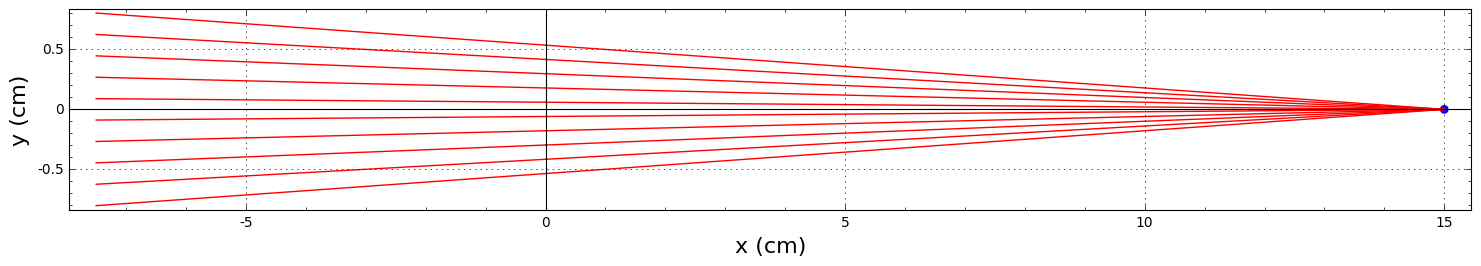

In [146]:
PlotEndBeam2(Filt_D,1.5,10,ratio=2)